In [188]:
import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timedelta

import math
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

import ipyvuetify as v
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Label

#from bqplot import pyplot as plt
from IPython.display import display, clear_output

import pickle

import yfinance as yf
#!pip install ffn -q
import ffn

start_date = datetime.today() - timedelta(days=20*365)
end_date = datetime.today()

%matplotlib inline

## Data download

In [228]:
def pickle_save(data, name):
    """Saves dataframe as pickle file"""
    assert type(name) is str
    f = open('data/%s.pkl' %name, 'wb')
    pickle.dump(data, f)
    f.close()
    
def pickle_load(name):
    """Loads dataframe as backup from pickle file"""
    assert type(name) is str
    f = open('data/%s.pkl' %name, 'rb')
    data = pickle.load(f)
    f.close()
    return data

In [229]:
def load_etfs(start_date, end_date):
    """
    download data for GLD, TLT and SPY ETFs from yahoo finance;
    save results in pickle file and returns pandas df
    """
        
    try:
        data = ffn.get('GLD:Close, TLT:Close, SPY:Close',\
                       start=start_date, end=end_date)
        data.columns = ['GLD', 'TLT', 'SPY']
        pickle_save(data, 'etf_history')
        print('Download finished')
    
    except AssertionError as error:        
        pickle_load('etf_history')
        print('Problem with download, using backup')
        print(error)
    
    return data

In [230]:
def load_currencies(start_date, end_date):
    """
    download data for EUR, GBP and ARS currencies from yahoo
    finance; save results in pickle file and returns pandas df
    """
    
    try:
        data = yf.download("EURUSD=X GBPUSD=X ARSUSD=X",
                           start_date, end_date)
        data = data.Close
        data.columns = ['ARSUSD', 'EURUSD', 'GBPUSD']
        pickle_save(data, 'ccy_history')
        print('Download finished')
    
    except AssertionError as error:
        pickle_load('ccy_history')
        print('Problem with download, using backup')
        print(error)
    
    return data

In [231]:
def merge_dataframes(dataset1, dataset2):
    return pd.merge_asof(dataset1, dataset2, right_index=True,
                         left_index=True)

In [232]:
df = merge_dataframes(load_etfs(start_date, end_date),
               load_currencies(start_date, end_date))

Download finished
[*********************100%***********************]  3 of 3 downloaded
Download finished


In [233]:
df['GLD_eur'] = df['GLD'] / df['EURUSD']
df['GLD_gbp'] = df['GLD'] / df['GBPUSD']
df['GLD_ars'] = df['GLD'] / df['ARSUSD']

In [234]:
df['GLD_ret'] = df['GLD'].to_log_returns().dropna()
df['TLT_ret'] = df['TLT'].to_log_returns().dropna()
df['SPY_ret'] = df['SPY'].to_log_returns().dropna()

In [235]:
df = df.round(4) 

In [236]:
df.head()

,GLD,TLT,SPY,ARSUSD,EURUSD,GBPUSD,GLD_eur,GLD_gbp,GLD_ars,GLD_ret,TLT_ret,SPY_ret
Date,,,,,,,,,,,,
2004-11-18,44.38,88.97,118.74,0.3406,1.2949,1.8483,34.2729,24.0113,130.2995,NaN,NaN,NaN
2004-11-19,44.78,88.26,117.42,0.3441,1.3039,1.8601,34.3431,24.0740,130.1366,0.0090,-0.0080,-0.0112
2004-11-22,44.95,88.72,117.98,0.3391,1.3040,1.8598,34.4709,24.1693,132.5568,0.0038,0.0052,0.0048
2004-11-23,44.75,88.83,118.16,0.3405,1.3097,1.8690,34.1681,23.9433,131.4244,-0.0045,0.0012,0.0015
2004-11-24,45.05,88.83,118.44,0.3401,1.3178,1.8811,34.1858,23.9488,132.4610,0.0067,0.0000,0.0024


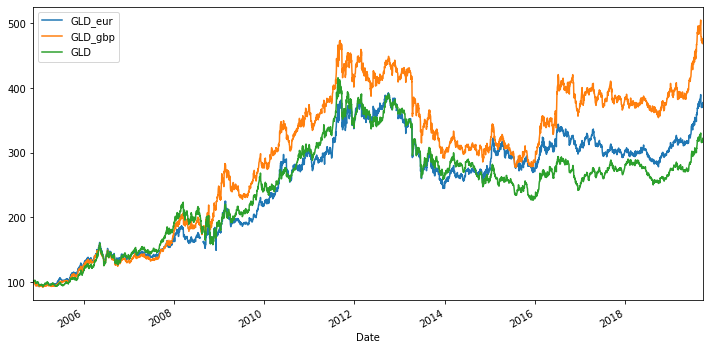

In [214]:
df[['GLD_eur', 'GLD_gbp', 'GLD']].rebase().plot(figsize=(12, 6))

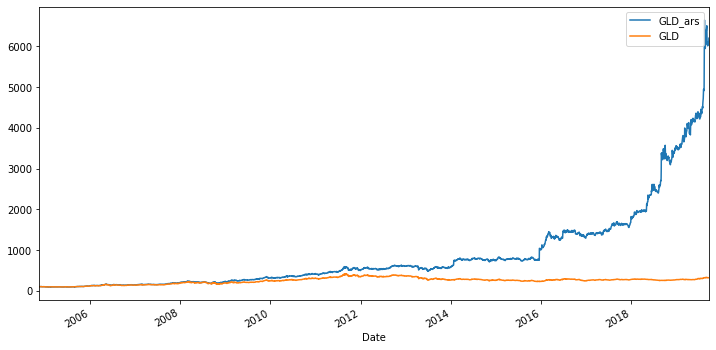

In [215]:
df[['GLD_ars', 'GLD']].rebase().plot(figsize=(12, 6))

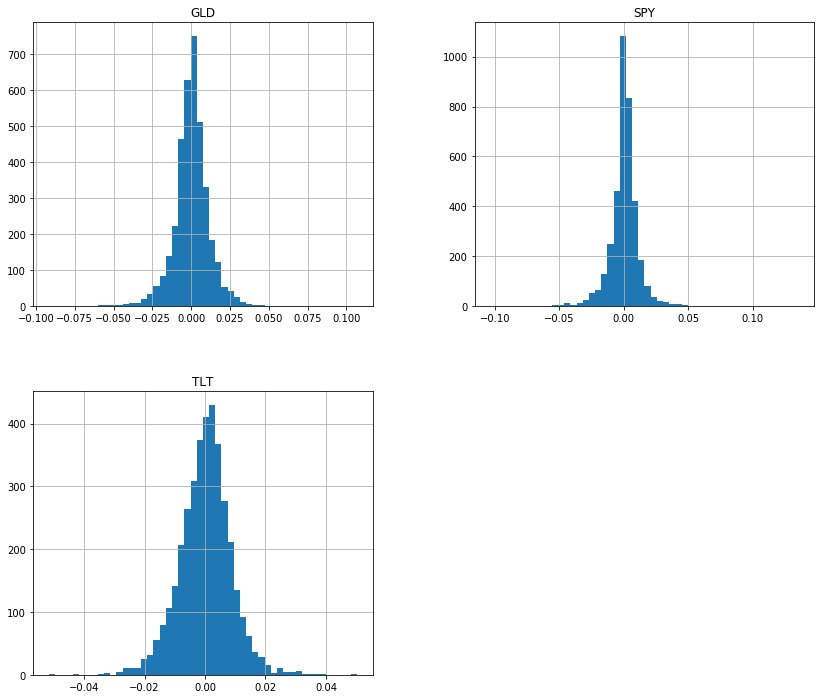

In [190]:
ax = returns.hist(bins = 50, figsize=(14, 12))

In [ ]:
data = df[['GLD', 'TLT', 'SPY']]

In [241]:
perf = data.calc_stats()

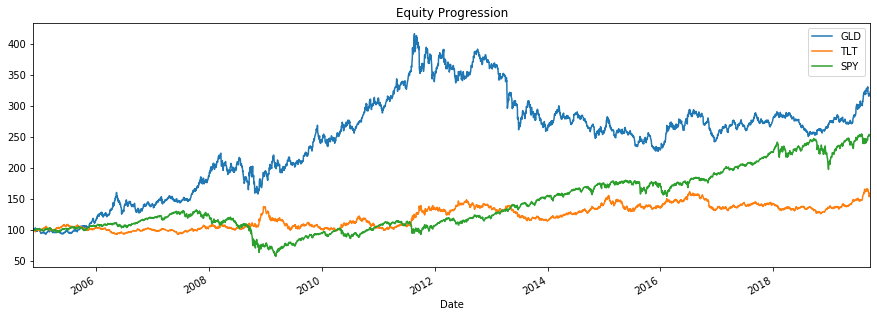

In [244]:
perf.plot()

In [245]:
perf.display()

Stat                 GLD         TLT         SPY
-------------------  ----------  ----------  ----------
Start                2004-11-18  2004-11-18  2004-11-18
End                  2019-09-20  2019-09-20  2019-09-20
Risk-free rate       0.00%       0.00%       0.00%

Total Return         222.10%     59.48%      151.20%
Daily Sharpe         0.52        0.30        0.43
Daily Sortino        0.84        0.50        0.67
CAGR                 8.20%       3.20%       6.41%
Max Drawdown         -45.56%     -28.46%     -56.47%
Calmar Ratio         0.18        0.11        0.11

MTD                  -0.56%      -3.66%      1.99%
3m                   9.03%       6.77%       0.82%
6m                   15.12%      15.66%      5.94%
YTD                  17.90%      16.77%      19.35%
1Y                   25.10%      21.12%      1.60%
3Y (ann.)            4.45%       1.73%       11.81%
5Y (ann.)            4.12%       4.34%       8.43%
10Y (ann.)           3.81%       3.99%       10.86%
Since Incep.

In [31]:
perf['GLD'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May     Jun    Jul    Aug     Sep     Oct    Nov     Dec     YTD
------  -----  -----  -----  -----  -----  ------  -----  -----  ------  ------  -----  ------  ------
  2004   0      0      0      0      0       0      0      0       0       0      1.67   -2.93   -1.31
  2005  -3.61   3.1   -1.63   1.24  -3.92    4.3   -1.43   1.35    7.6    -0.64   5.82    5.05   17.76
  2006   9.93  -1.11   3.62  12.03  -1.32   -4.67   3.15  -1.38   -4.53    1.29   6.89   -1.83   22.55
  2007   2.56   2.55  -1.11   2.05  -2.31   -1.94   2.37   1.11   10.51    6.95  -1.65    6.65   30.45
  2008  10.84   5.23  -6     -4.16   0.92    4.52  -1.44  -9.29    4.11  -16.14  12.57    7.73    4.92
  2009   5.54   1.45  -2.54  -3.33  10.23   -5.22   2.38   0.05    5.84    3.72  12.79   -7.2    24.03
  2010  -1.26   3.27  -0.44   5.88   3.05    2.36  -5.09   5.71    4.78    3.68   2.11    2.44   29.27
  2011  -6.38   6      1.6    8.94  -1.79   -2.43   8.42  12.27  -11.06  

/root/miniconda3/envs/py4fi/lib/python3.7/site-packages/ffn/core.py:501: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  r = self.return_table.ix[k].values


/root/miniconda3/envs/py4fi/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


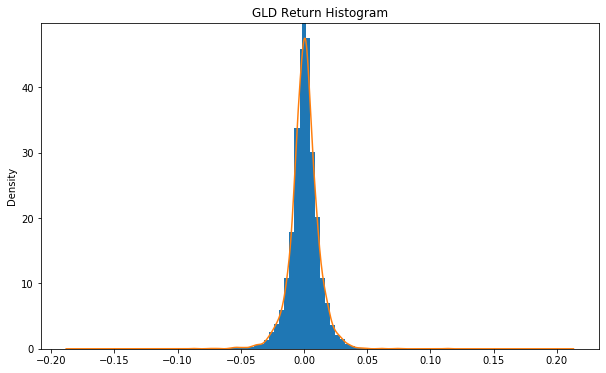

In [45]:
perf[0].plot_histogram(bins=50, figsize=(10, 6));

/root/miniconda3/envs/py4fi/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


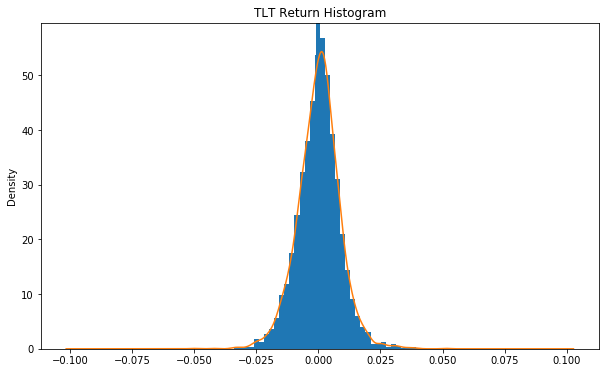

In [46]:
perf[1].plot_histogram(bins=50, figsize=(10, 6));

/root/miniconda3/envs/py4fi/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


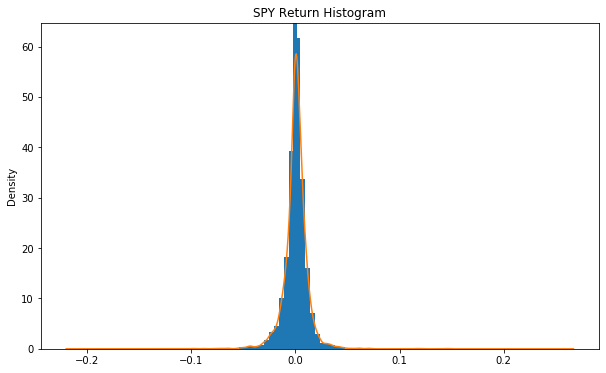

In [47]:
perf[2].plot_histogram(bins=50, figsize=(10, 6));

### QQ plot - test for non-normality of log returns (quantile-quantile plot)
## FAT TAILS

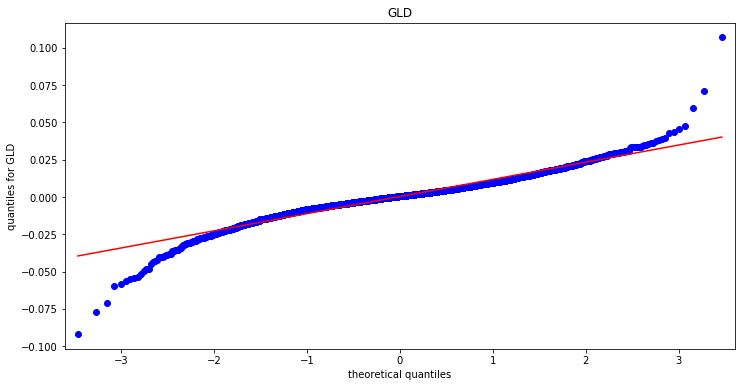

In [246]:
fig, ax = plt.subplots(figsize=(12, 6))
sm.qqplot(df['GLD_ret'].dropna(), line='s', ax=ax)
plt.title('GLD')
plt.xlabel('theoretical quantiles')
plt.ylabel('quantiles for GLD')
plt.show();

In [34]:
perf['GLD'].stats

start                    2004-11-18 00:00:00
end                      2019-09-20 00:00:00
rf                                         0
total_return                         2.22105
cagr                               0.0820314
max_drawdown                        -0.45555
calmar                              0.180071
mtd                              -0.00556524
three_month                        0.0903058
six_month                           0.151152
ytd                                 0.178969
one_year                            0.250985
three_year                         0.0445494
five_year                          0.0411965
ten_year                           0.0381097
incep                              0.0820314
daily_sharpe                        0.523717
daily_sortino                       0.843928
daily_mean                         0.0956505
daily_vol                           0.182638
daily_skew                         -0.154286
daily_kurt                           6.56276
best_day  

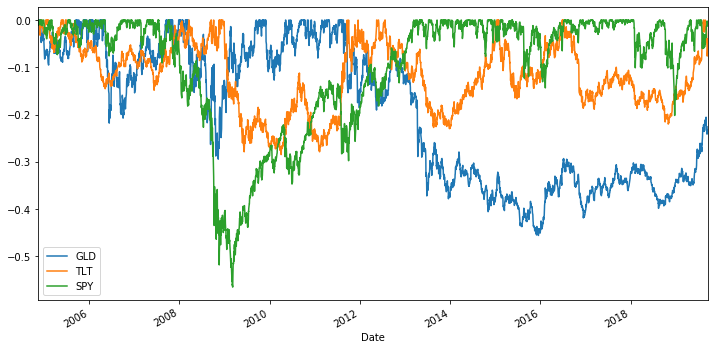

In [247]:
ffn.to_drawdown_series(data).plot(figsize=(12, 6))

In [92]:
returns.calc_mean_var_weights().as_format('.2%')

gldclose    28.12%
tltclose    36.21%
spyclose    35.67%
dtype: object

In [93]:
returns.calc_erc_weights().as_format('.2%')

gldclose    24.24%
tltclose    42.73%
spyclose    33.02%
Name: erc, dtype: object

## rolling correlation?

## rolling sharpe
$SPY $TLT 50/50 portfolio a main roadmap. I track 100, 150 and 200-day Sharpe Ratios on this portfolio. The 150-day hit 5 (annualized), a massive record (since 1995). For those looking for a blow-off move in risk assets, it already happened this year.

https://towardsdatascience.com/calculating-sharpe-ratio-with-python-755dcb346805 <br>
https://stackoverflow.com/questions/49091044/python-rolling-sharpe-ratio-with-pandas-or-numpy

### Voila app - what are interesting things to manipulate

### histogram
### manipulate weights of portf